# Agent-based energy network model

## Imports:

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import link_agents, distr_energy1, simulate, create_and_simulate, batch_simulate_ruben
from plot import plot_prod_index_conlengths
from matplotlib.animation import FuncAnimation
import locations
import pandas as pd
%matplotlib inline

## Plot Funktionen

In [34]:
linestyles = ['-', '--', ':', '-.']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shapes = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot_falloff_to_measurment(falloff, measurment, measurment_std, con_lengths, ylabel, filename):
    plt.figure(figsize=(8,5))
    for i in range(len(con_lengths)):
        plt.errorbar(falloff, measurment[i], yerr=measurment_std[i], 
                label=f'con_length={con_lengths[i]}',
                linestyle='--', marker="o", markersize=3, capsize=3)
    plt.ylabel(ylabel)
    plt.xlabel("Falloff")
    plt.legend()
    plt.grid()
    plt.ylim(0, 1)
    plt.savefig(filename+".pdf")
    plt.show()

def plot_prod_to_measurment(prod_per, measurment, measurment_std, con_lengths, ylabel, filename):
    plt.figure(figsize=(8, 5))
    for i in range(len(con_lengths)):
        plt.errorbar(prod_per, measurment[i], yerr=measurment_std[i], 
                label=f'con_length={con_lengths[i]}',
                linestyle='--', marker="o", markersize=3, capsize=3)
    plt.ylabel(ylabel)
    plt.xlabel("Production %")
    plt.legend()
    plt.grid()
    plt.ylim(0, 1)
    plt.savefig(filename+".pdf")
    plt.show()

def plot_conlength_to_measurment(prod_per, measurment, measurment_std, con_lengths, ylabel, filename, titles=None):
    plt.figure(figsize=(8, 5))
    for j in range(len(measurment)):
        if len(measurment) > 1:
            plt.plot(0, -10, color='black', linestyle=linestyles[j], label=titles[j])
        for i in range(len(prod_per)):
            if j == len(measurment)-1:
                plt.errorbar(con_lengths, measurment[j][:, i], yerr=measurment_std[j][:, i], 
                        label=f'prod_per={prod_per[i]}',
                        linestyle=linestyles[j], marker=shapes[i], color = colors[i] ,markersize=4, capsize=4)
            else:
                plt.errorbar(con_lengths, measurment[j][:, i], yerr=measurment_std[j][:, i], 
                        linestyle=linestyles[j], marker=shapes[i], color = colors[i] ,markersize=4, capsize=4)
    plt.ylabel(ylabel)
    plt.xlabel("Connection Length / m")
    plt.legend()
    plt.grid()
    plt.ylim(0, 1)
    plt.savefig(filename+'.pdf')
    plt.show()
    

## Simulation Grid

In [31]:
df_prof = pd.read_csv('profiles.csv',index_col=False)
base_con_profile = np.array(df_prof['realistic demand'].tolist())
base_pro_profile = np.array(df_prof['realistic production'].tolist())

con_lengths1 = np.linspace(0, 200, 21)

n = 4

pos_args1 = (np.array([np.full(n, 1300), np.full(n, 1000), np.arange(1, 5), np.arange(1, 5)])).transpose()
prod_per1 = [locations.prodPercentage(locations.grid(*i)) for i in pos_args1]

grid_links_per1, grid_energy_loss_per1, grid_supply_per1, grid_links_per_std1, grid_energy_loss_per_std1, grid_supply_per_std1 = \
    batch_simulate_ruben(
        link_agents,
        distr_energy1,
        base_con_profile,
        base_pro_profile,
        con_lengths1,
        simulations = 10,
        positionsfunc=locations.grid,
        positionsArgs=pos_args1,
        demand_std=0.07,
        production_std=base_pro_profile*0.15
        )

/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scalars
  links_percentage = np.sum(total_links_used > (t1-t0)*links_per_threshold)\
/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scalars
  links_percentage = np.sum(total_links_used > (t1-t0)*links_per_threshold)\
/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scalars
  links_percentage = np.sum(total_links_used > (t1-t0)*links_per_threshold)\
/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scalars
  links_percentage = np.sum(total_links_used > (t1-t0)*links_per_threshold)\
/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scala

## Simulation Random

In [32]:
pos_args = np.array([np.full(len(prod_per1), int(1300)), np.full(len(prod_per1), int(1000)), prod_per1]).transpose()

rand_links_per1, rand_energy_loss_per1, rand_supply_per1, rand_links_per_std1, rand_energy_loss_per_std1, rand_supply_per_std1 = \
    batch_simulate_ruben(
        link_agents,
        distr_energy1,
        base_con_profile,
        base_pro_profile,
        con_lengths1,
        simulations = 10,
        positionsfunc=locations.random,
        positionsArgs=pos_args,
        demand_std=0.07,
        production_std=base_pro_profile*0.15
        )

/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scalars
  links_percentage = np.sum(total_links_used > (t1-t0)*links_per_threshold)\
/Users/user/Documents/NiMoNa/energy_network_abm/main_programm/simulation.py:393: RuntimeWarning: invalid value encountered in long_scalars
  links_percentage = np.sum(total_links_used > (t1-t0)*links_per_threshold)\


## Vergleich Plotten

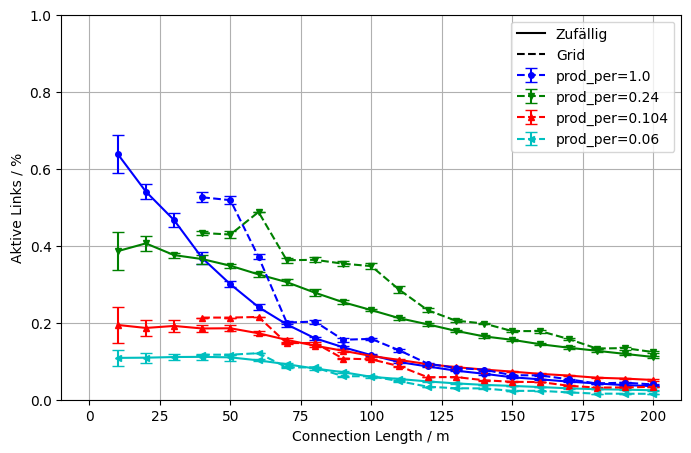

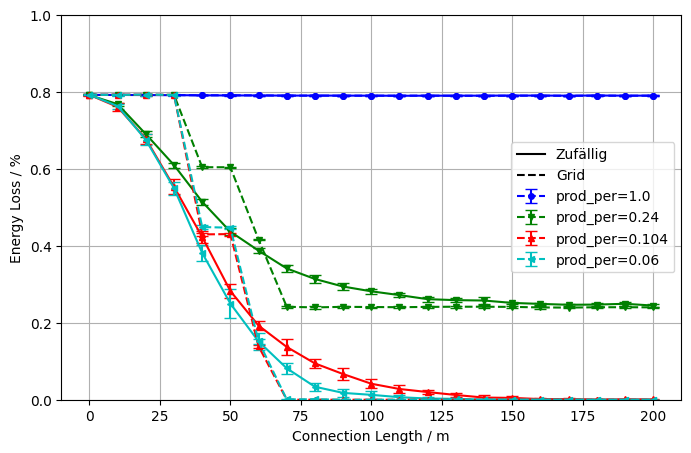

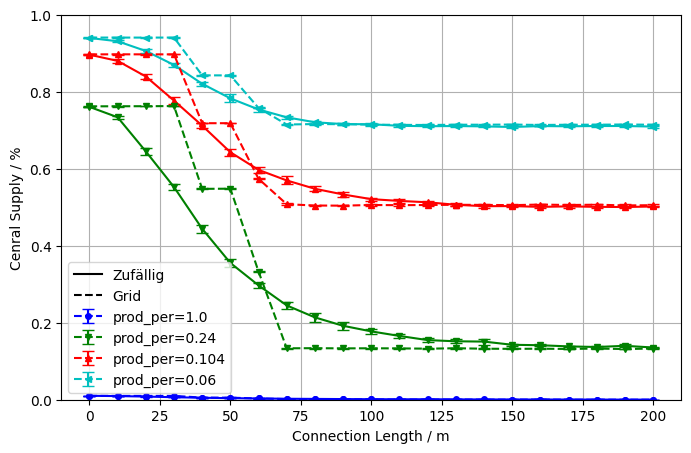

In [38]:
plot_conlength_to_measurment(prod_per1, 
                            [rand_links_per1, grid_links_per1], 
                            [rand_links_per_std1, grid_links_per_std1], 
                            con_lengths1, 
                            "Aktive Links / %", "Links_conlength", ["Zufällig", "Grid"])
                            
plot_conlength_to_measurment(prod_per1, 
                            [rand_energy_loss_per1, grid_energy_loss_per1],
                            [rand_energy_loss_per_std1, grid_energy_loss_per_std1],
                            con_lengths1, 
                            "Energy Loss / %", "EnergyLoss_conlength", ["Zufällig", "Grid"])


plot_conlength_to_measurment(prod_per1, 
                            [rand_supply_per1, grid_supply_per1],
                            [rand_supply_per_std1, grid_supply_per_std1], 
                            con_lengths1, 
                            "Cenral Supply / %", "CentralSupply_conlength", ["Zufällig", "Grid"])

## Simulation Kreise

In [39]:
falloff = np.linspace(0, 5, 11)
con_lengths2 = np.linspace(50, 350, 4)

circ_pos_args1 = [[1300, [1000] , [[650, 650]], [2000], [i], [0], 0.25] for i in falloff]
circ_pos_args2 = [[1300, [500, 500], [[380, 380], [920, 920]], [2000, 2000], [i, i], [0, 0], 0.25] for i in falloff]
circ_pos_args3 = [[1300, 
                    [250, 250, 250, 250], 
                    [[325, 325], [975, 975], [925, 325], [325, 975]], 
                    [2000, 2000, 2000, 2000],
                    [i, i, i, i],
                    [0, 0, 0, 0], 0.2] for i in falloff]

circ_links_per1, circ_energy_loss_per1, circ_supply_per1, circ_links_per_std1, circ_energy_loss_per_std1, circ_supply_per_std1 = \
    batch_simulate_ruben(
        link_agents,
        distr_energy1,
        base_con_profile,
        base_pro_profile,
        con_lengths2,
        simulations = 10,
        positionsfunc=locations.circles,
        positionsArgs=circ_pos_args1,
        demand_std=0.07,
        production_std=base_pro_profile*0.15
        )

circ_links_per2, circ_energy_loss_per2, circ_supply_per2, circ_links_per_std2, circ_energy_loss_per_std2, circ_supply_per_std2 = \
    batch_simulate_ruben(
        link_agents,
        distr_energy1,
        base_con_profile,
        base_pro_profile,
        con_lengths2,
        simulations = 10,
        positionsfunc=locations.circles,
        positionsArgs=circ_pos_args2,
        demand_std=0.07,
        production_std=base_pro_profile*0.15
        )

circ_links_per3, circ_energy_loss_per3, circ_supply_per3, circ_links_per_std3, circ_energy_loss_per_std3, circ_supply_per_std3 = \
    batch_simulate_ruben(
        link_agents,
        distr_energy1,
        base_con_profile,
        base_pro_profile,
        con_lengths2,
        simulations = 10,
        positionsfunc=locations.circles,
        positionsArgs=circ_pos_args2,
        demand_std=0.07,
        production_std=base_pro_profile*0.15
        )

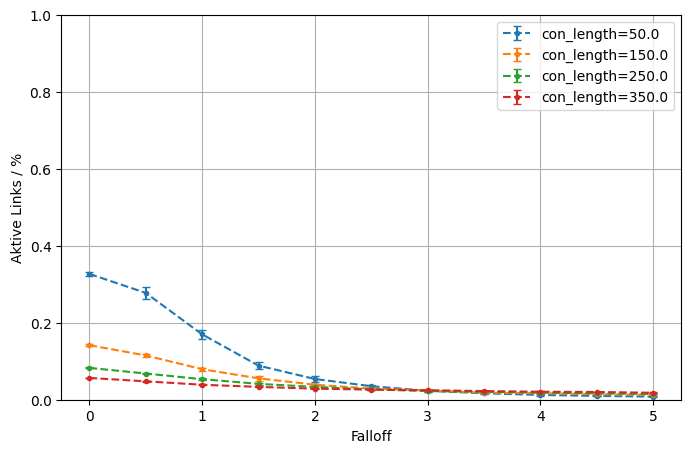

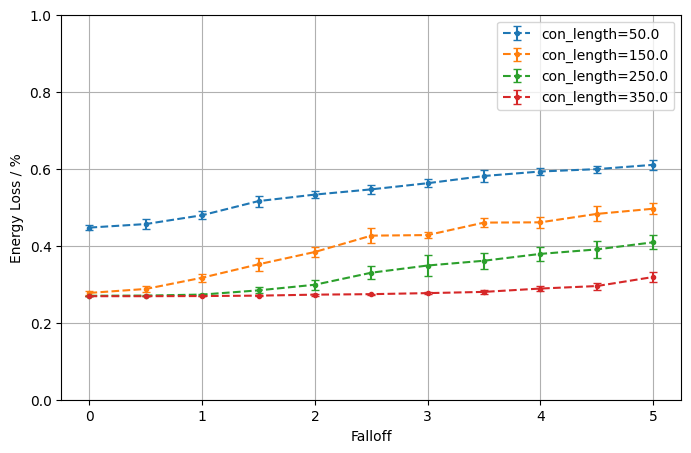

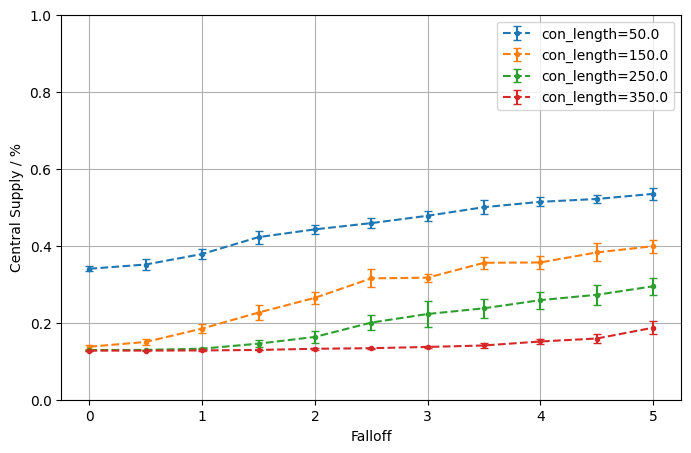

In [130]:
plot_falloff_to_measurment(falloff, circ_links_per1, circ_links_per_std1, con_lengths2, "Aktive Links / %", "1Kreis_links")
plot_falloff_to_measurment(falloff, circ_energy_loss_per1, circ_energy_loss_per_std1, con_lengths2, "Energy Loss / %", "1Kreis_energyloss")
plot_falloff_to_measurment(falloff, circ_supply_per1, circ_supply_per_std1, con_lengths2, "Central Supply / %", "1Kreis_supply")

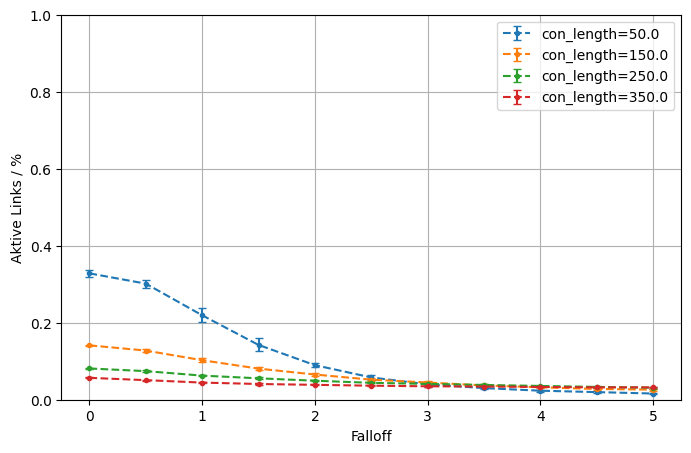

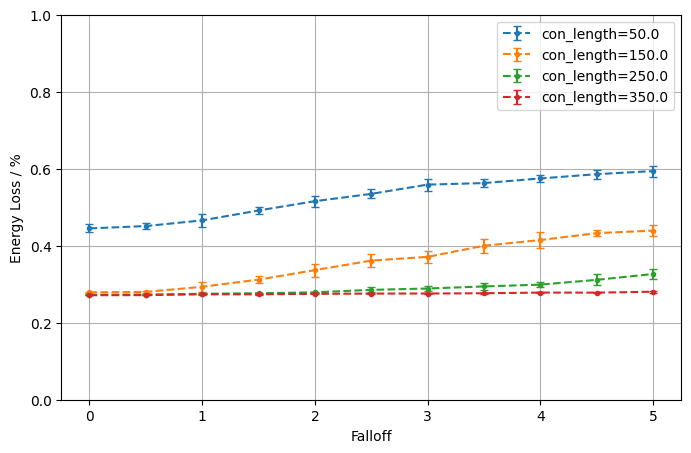

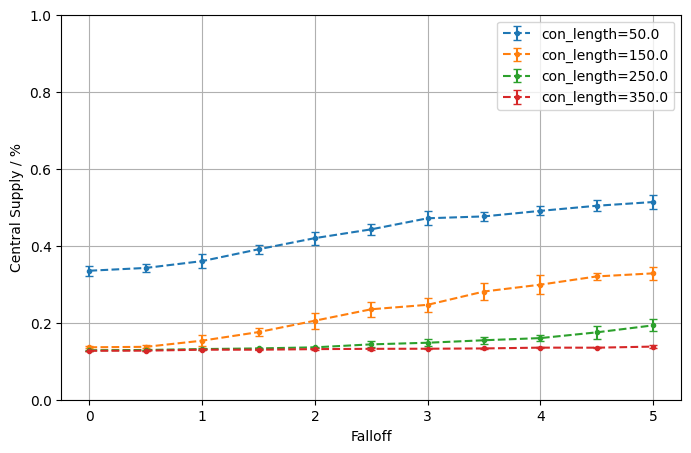

In [131]:
plot_falloff_to_measurment(falloff, circ_links_per2, circ_links_per_std2, con_lengths2, "Aktive Links / %", "2Kreise_links")
plot_falloff_to_measurment(falloff, circ_energy_loss_per2, circ_energy_loss_per_std2, con_lengths2, "Energy Loss / %", "2Kreise_energyloss")
plot_falloff_to_measurment(falloff, circ_supply_per2, circ_supply_per_std2, con_lengths2, "Central Supply / %", "2Kreise_supply")

In [29]:
angles = np.random.rand(1000)*2*np.pi
radii = np.random.rand(1000)

falloff = np.append(np.full(1,0) , np.linspace(0, 5, 21))
print(falloff)

fig, ax = plt.subplots(figsize=(6,6))
def animate(i):
    ax.clear()
    producers = [i <= 0.25 for i in np.linspace(0, 1, 1000)]
    array = locations.polar(1300, np.array([radii, angles, producers]).transpose(), 920, falloff[i], 0, [650, 650])
    producers = np.empty([0, 2])
    consumers = np.empty([0, 2])
    for j in array:
   
        if j[2]==1:
            
            producers = np.append(producers,[j[:-1]], axis=0)
            
        else:
            consumers = np.append(consumers, [j[:-1]], axis=0)
    ax.plot(consumers[:,0], consumers[:,1], ".", markersize=4)
    ax.plot(producers[:,0], producers[:,1], ".", markersize=7)
    ax.set_ylim(-0.025*1300, 1.025*1300)
    ax.set_xlim(-0.025*1300, 1.025*1300)

anim = FuncAnimation(fig, animate, frames=22, interval=500)
anim.save('polar.gif', dpi=80, writer='imagemagick')

[0.   0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.
 3.25 3.5  3.75 4.   4.25 4.5  4.75 5.  ]


<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.
